# Assignment 1 - Deep Learning (OPTIONAL)
[Annalisa Paladino](mailto:ANNALISA.PALADINO@studenti.units.it)  

## Problem:

1.   Read carefully the paper [*“Learning representations by back-propagating errors” (Rumelhart et al., 1986)*](https://bucket.ballarin.cc/papers/oth/rumelhart1986.pdf). Read it in its entirety, but focus specifically on the experiment outlined in *Fig. 1* (learning mirror symmetries in 6-digits numbers).

2.   Reproduce in `PyTorch` (or any other *DL* library you are confident using) such experiment. Try to be as close as possible to the original protocol, with respect to network architecture, activation functions, learning algorithm and parameter initialization.

3.   Assess model accuracy, and inspect the weights of the trained network. Do they provide a solution to the problem?

4.   Compare the solution to the one reported in the original paper. Comment.

5.   **Optional:** you are warmly encouraged to explore and discuss additional variations to the experimental details and the results they produce on final accuracy and weights of the network. Some of such changes may include (but are not limited to):
     -   changing the activation functions of the network;
     -   changing the optimizer and/or its hyperparameters;
     -   adding a learning rate scheduler, *etc.*

## 5. Optional Solution 

This part is just to explore and discuss additional variations to the implementation I proposed in the main document, for this reason I will not repeat myself too much, for further clarifications check the main document.

Again, let's download the necessary libraries

In [34]:
import torch
import torch.nn as nn
import numpy as np
from torch import Tensor
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from itertools import product
import matplotlib.pyplot as plt

## 1st attempt: change the loss

Now let's try with a different loss criterion, instead of using the one proposed by the paper we can try with MSE

### Create the dataset

The dataset is composed of lists of 6 binary elements, in total there are 64 elements. 

In [35]:
# Create the dataset
def is_symmetric(binary_string):
    return float(binary_string == binary_string[::-1])

# All possible 6-bit binary numbers
inputs = torch.tensor([list(map(float, format(i, '06b'))) for i in range(64)], dtype=torch.float32)
# Target outputs for mirror symmetry
targets = torch.tensor([[is_symmetric(bin(i)[2:].zfill(6))] for i in range(64)], dtype=torch.float32)

# DataLoader
train_data = TensorDataset(inputs, targets)
train_loader = DataLoader(train_data, batch_size=64, shuffle=False)

### Define the network

In [36]:
# Define the network
class MirrorSymmetryNetwork(nn.Module):
    def __init__(self):
        super(MirrorSymmetryNetwork, self).__init__()
        # Define the network layers
        self.hidden = nn.Linear(6, 2, bias=True)
        self.output = nn.Linear(2, 1, bias=True)
        # Sigmoid activation function
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# Initialize the network
net = MirrorSymmetryNetwork()

In [37]:
# Initialize weights and biases within the range [-0.3, 0.3]
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.uniform_(m.weight, -0.3, 0.3)
        nn.init.uniform_(m.bias, -0.3, 0.3)

# Apply weight initialization
net.apply(init_weights)

MirrorSymmetryNetwork(
  (hidden): Linear(in_features=6, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

### Define loss & optimizer

Now, instead of the loss described in the paper we are using MSE

In [38]:
# Loss and optimizer
lss = nn.MSELoss()
    
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9) 

### Training

In [39]:
# Initialize lists to store loss and accuracy
losses = []
accuracies = []

# Training loop
for epoch in range(1425):
    for input_vector, target in train_loader:
        output = net(input_vector)
        loss = lss(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Record the loss
    losses.append(loss.item())
    
    # Calculate accuracy
    with torch.no_grad():
        predictions = net(inputs).round()
        accuracy = (predictions == targets).float().mean().item()
        accuracies.append(accuracy)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item()}, Accuracy = {accuracy}')

Epoch 0: Loss = 0.26553255319595337, Accuracy = 0.125
Epoch 100: Loss = 0.10941645503044128, Accuracy = 0.875
Epoch 200: Loss = 0.10938103497028351, Accuracy = 0.875
Epoch 300: Loss = 0.10937830805778503, Accuracy = 0.875
Epoch 400: Loss = 0.10937581211328506, Accuracy = 0.875
Epoch 500: Loss = 0.1093735322356224, Accuracy = 0.875
Epoch 600: Loss = 0.10937140882015228, Accuracy = 0.875
Epoch 700: Loss = 0.1093694269657135, Accuracy = 0.875
Epoch 800: Loss = 0.10936753451824188, Accuracy = 0.875
Epoch 900: Loss = 0.10936573892831802, Accuracy = 0.875
Epoch 1000: Loss = 0.10936398059129715, Accuracy = 0.875
Epoch 1100: Loss = 0.10936227440834045, Accuracy = 0.875
Epoch 1200: Loss = 0.10936059802770615, Accuracy = 0.875
Epoch 1300: Loss = 0.10935892164707184, Accuracy = 0.875
Epoch 1400: Loss = 0.10935724526643753, Accuracy = 0.875


In [40]:
with torch.no_grad():
    for param in net.parameters():
        print(param.detach().clone())

tensor([[ 0.3579, -0.0915,  0.1322, -0.2336,  0.1518,  0.1035],
        [-0.2432,  0.0932, -0.2039,  0.1470, -0.1950,  0.2512]])
tensor([-0.1457, -0.3099])
tensor([[-0.7554, -0.7308]])
tensor([-1.2595])


### Plots

Text(0.5, 1.0, 'Loss vs. Epoch')

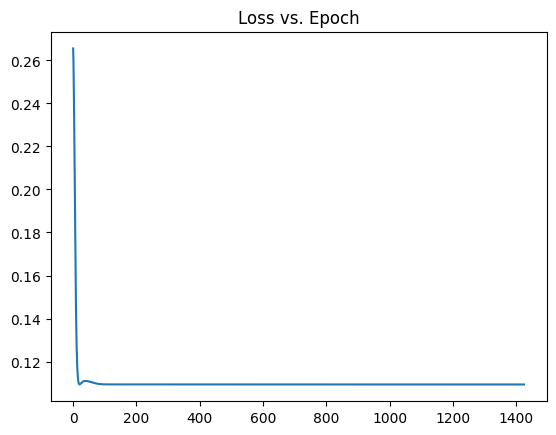

In [41]:
plt.plot(losses)
plt.title('Loss vs. Epoch')

Text(0.5, 1.0, 'Accuracy vs. Epoch')

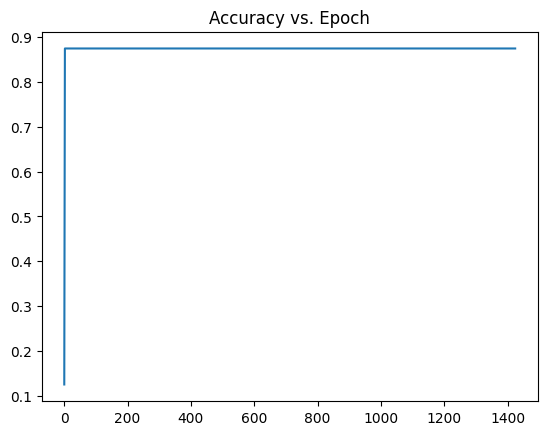

In [42]:
plt.plot(accuracies)
plt.title('Accuracy vs. Epoch')

## 2nd attempt: changing the optimizer 

Now let's try to change the learning rate by setting it to 1

In [43]:
net = MirrorSymmetryNetwork()
net.apply(init_weights)

MirrorSymmetryNetwork(
  (hidden): Linear(in_features=6, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [44]:
# Loss and optimizer
def lss(output, target):
        return torch.sum((output - target) ** 2)/2
    
optimizer = torch.optim.SGD(net.parameters(), lr=1, momentum=0.9)

In [45]:
# Initialize lists to store loss and accuracy
losses = []
accuracies = []

# Training loop
for epoch in range(1425):
    for input_vector, target in train_loader:
        output = net(input_vector)
        loss = lss(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Record the loss
    losses.append(loss.item())
    
    # Calculate accuracy
    with torch.no_grad():
        predictions = net(inputs).round()
        accuracy = (predictions == targets).float().mean().item()
        accuracies.append(accuracy)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item()}, Accuracy = {accuracy}')

Epoch 0: Loss = 8.988725662231445, Accuracy = 0.875
Epoch 100: Loss = 4.0, Accuracy = 0.875
Epoch 200: Loss = 4.0, Accuracy = 0.875
Epoch 300: Loss = 4.0, Accuracy = 0.875
Epoch 400: Loss = 4.0, Accuracy = 0.875
Epoch 500: Loss = 4.0, Accuracy = 0.875
Epoch 600: Loss = 4.0, Accuracy = 0.875
Epoch 700: Loss = 4.0, Accuracy = 0.875
Epoch 800: Loss = 4.0, Accuracy = 0.875
Epoch 900: Loss = 4.0, Accuracy = 0.875
Epoch 1000: Loss = 4.0, Accuracy = 0.875
Epoch 1100: Loss = 4.0, Accuracy = 0.875
Epoch 1200: Loss = 4.0, Accuracy = 0.875
Epoch 1300: Loss = 4.0, Accuracy = 0.875
Epoch 1400: Loss = 4.0, Accuracy = 0.875


In [46]:
with torch.no_grad():
    for param in net.parameters():
        print(param.detach().clone())

tensor([[-1.9841, -2.0108, -2.3474, -1.9130, -2.3443, -2.2811],
        [ 2.1603,  2.0556,  1.9578,  2.2334,  1.8994,  1.8529]])
tensor([-3.9329,  3.8220])
tensor([[-32.0174, -32.1892]])
tensor([-65.6990])


Text(0.5, 1.0, 'Loss vs. Epoch')

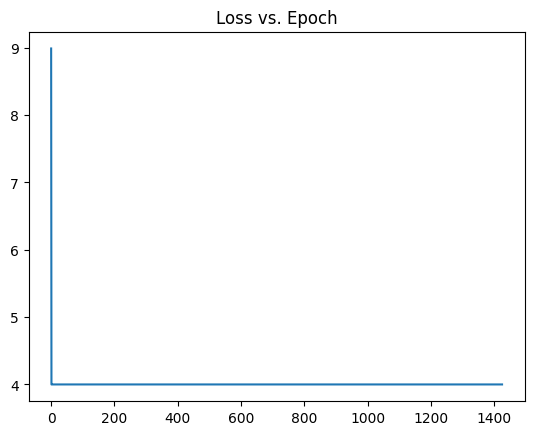

In [47]:
plt.plot(losses)
plt.title('Loss vs. Epoch')

Text(0.5, 1.0, 'Accuracy vs. Epoch')

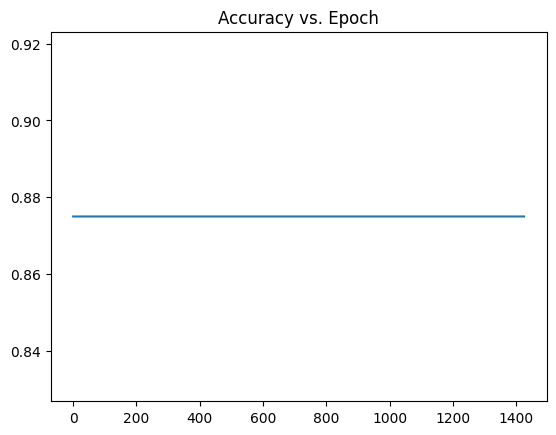

In [48]:
plt.plot(accuracies)
plt.title('Accuracy vs. Epoch')

## Attempt 3: change both the optimizer and the loss

In this 3rd attemp we can unite attempt 1 and attempt 2: now the loss is MSE and the optimizer has learning rate 1 and momentum 0.9

In [49]:
net = MirrorSymmetryNetwork()
net.apply(init_weights)

MirrorSymmetryNetwork(
  (hidden): Linear(in_features=6, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [50]:
# Loss and optimizer
lss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1, momentum=0.9)

In [51]:
# Initialize lists to store loss and accuracy
losses = []
accuracies = []

# Training loop
for epoch in range(1425):
    for input_vector, target in train_loader:
        output = net(input_vector)
        loss = lss(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Record the loss
    losses.append(loss.item())
    
    # Calculate accuracy
    with torch.no_grad():
        predictions = net(inputs).round()
        accuracy = (predictions == targets).float().mean().item()
        accuracies.append(accuracy)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item()}, Accuracy = {accuracy}')

Epoch 0: Loss = 0.23332522809505463, Accuracy = 0.875
Epoch 100: Loss = 0.11063044518232346, Accuracy = 0.875
Epoch 200: Loss = 0.10945910215377808, Accuracy = 0.875
Epoch 300: Loss = 0.10906718671321869, Accuracy = 0.875
Epoch 400: Loss = 0.10806300491094589, Accuracy = 0.875
Epoch 500: Loss = 0.10368695855140686, Accuracy = 0.875
Epoch 600: Loss = 0.0880250409245491, Accuracy = 0.875
Epoch 700: Loss = 0.060746002942323685, Accuracy = 0.875
Epoch 800: Loss = 0.03690158948302269, Accuracy = 1.0
Epoch 900: Loss = 0.021576477214694023, Accuracy = 1.0
Epoch 1000: Loss = 0.012119844555854797, Accuracy = 1.0
Epoch 1100: Loss = 0.007239118684083223, Accuracy = 1.0
Epoch 1200: Loss = 0.004752283450216055, Accuracy = 1.0
Epoch 1300: Loss = 0.0033803298138082027, Accuracy = 1.0
Epoch 1400: Loss = 0.0025537770707160234, Accuracy = 1.0


In [52]:
with torch.no_grad():
    for param in net.parameters():
        print(param.detach().clone())

tensor([[ 9.0497,  4.4338,  6.8005, -6.8022, -4.4350, -9.0511],
        [-9.0539, -4.4364, -6.8043,  6.8026,  4.4352,  9.0525]])
tensor([-1.8344, -1.8348])
tensor([[-13.1133, -13.1116]])
tensor([5.8002])


Text(0.5, 1.0, 'Loss vs. Epoch')

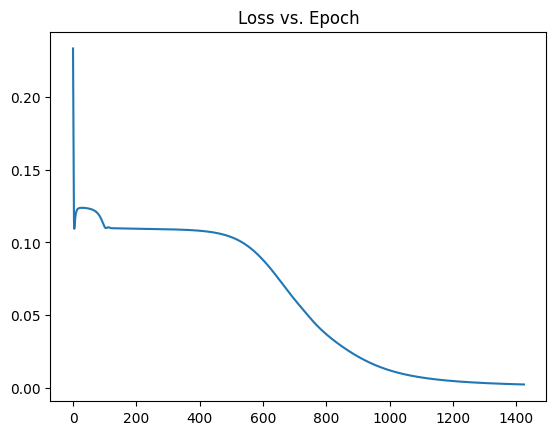

In [53]:
plt.plot(losses)
plt.title('Loss vs. Epoch')

Text(0.5, 1.0, 'Accuracy vs. Epoch')

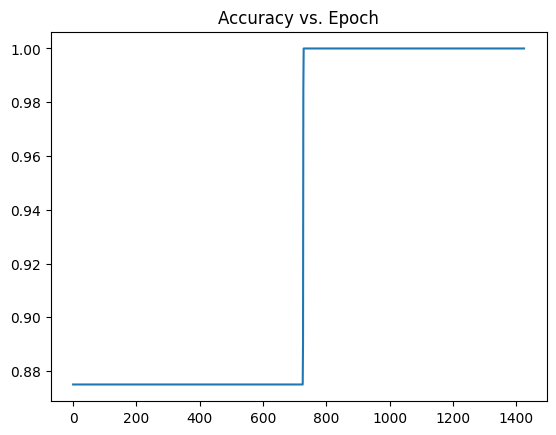

In [54]:
plt.plot(accuracies)
plt.title('Accuracy vs. Epoch')

## Attempt 4: change the optimizer (use Adam)

We can try to use Adam optimizer instead of SGD 

In [55]:
net = MirrorSymmetryNetwork()
net.apply(init_weights)

MirrorSymmetryNetwork(
  (hidden): Linear(in_features=6, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [56]:
# Loss and optimizer
lss = nn.MSELoss()

optimizer = torch.optim.Adam(net.parameters(), lr=0.1)

In [57]:
# Initialize lists to store loss and accuracy
losses = []
accuracies = []

# Training loop
for epoch in range(1425):
    for input_vector, target in train_loader:
        output = net(input_vector)
        loss = lss(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Record the loss
    losses.append(loss.item())
    
    # Calculate accuracy
    with torch.no_grad():
        predictions = net(inputs).round()
        accuracy = (predictions == targets).float().mean().item()
        accuracies.append(accuracy)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item()}, Accuracy = {accuracy}')

Epoch 0: Loss = 0.29437902569770813, Accuracy = 0.125
Epoch 100: Loss = 0.10826130956411362, Accuracy = 0.875
Epoch 200: Loss = 0.10602041333913803, Accuracy = 0.875
Epoch 300: Loss = 0.09872125089168549, Accuracy = 0.890625
Epoch 400: Loss = 0.09228555858135223, Accuracy = 0.890625
Epoch 500: Loss = 0.09050311893224716, Accuracy = 0.890625
Epoch 600: Loss = 0.08995728194713593, Accuracy = 0.890625
Epoch 700: Loss = 0.08972019702196121, Accuracy = 0.890625
Epoch 800: Loss = 0.08958852291107178, Accuracy = 0.890625
Epoch 900: Loss = 0.08950553089380264, Accuracy = 0.890625
Epoch 1000: Loss = 0.0894492119550705, Accuracy = 0.890625
Epoch 1100: Loss = 0.08940890431404114, Accuracy = 0.890625
Epoch 1200: Loss = 0.08937890827655792, Accuracy = 0.890625
Epoch 1300: Loss = 0.08935588598251343, Accuracy = 0.890625
Epoch 1400: Loss = 0.08933775126934052, Accuracy = 0.890625


In [58]:
with torch.no_grad():
    for param in net.parameters():
        print(param.detach().clone())

tensor([[  5.0934,   6.0274,  10.5189,   6.6250,  10.5003,  10.4701],
        [ 17.4984,   8.7154,  -9.0884,   8.6969,  -9.0988, -17.8947]])
tensor([-3.4199, -7.3083])
tensor([[-4.5026, -4.4979]])
tensor([3.0136])


Text(0.5, 1.0, 'Loss vs. Epoch')

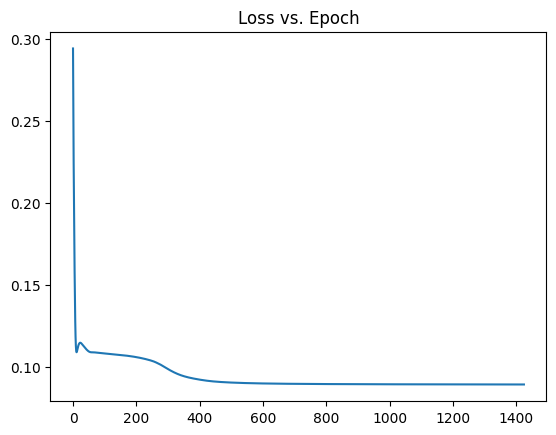

In [59]:
plt.plot(losses)
plt.title('Loss vs. Epoch')

Text(0.5, 1.0, 'Accuracy vs. Epoch')

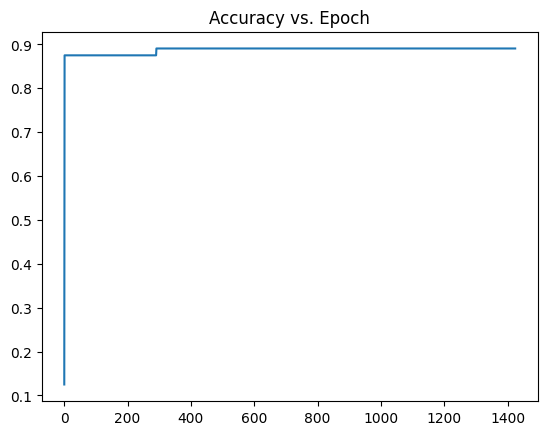

In [60]:
plt.plot(accuracies)
plt.title('Accuracy vs. Epoch')

## Attempt 5: change activation function

Now instead of using the Sigmoid activation function we can try to use ReLU

In [61]:
# Define the network
class MirrorSymmetryNetwork(nn.Module):
    def __init__(self):
        super(MirrorSymmetryNetwork, self).__init__()
        # Define the network layers
        self.hidden = nn.Linear(6, 2, bias=True)
        self.output = nn.Linear(2, 1, bias=True)
        # ReLU activation function
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# Initialize the network
net = MirrorSymmetryNetwork()
net.apply(init_weights)

MirrorSymmetryNetwork(
  (hidden): Linear(in_features=6, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [62]:
# Loss and optimizer
lss = nn.MSELoss()
    
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

In [63]:
# Initialize lists to store loss and accuracy
losses = []
accuracies = []

# Training loop
for epoch in range(1425):
    for input_vector, target in train_loader:
        output = net(input_vector)
        loss = lss(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Record the loss
    losses.append(loss.item())
    
    # Calculate accuracy
    with torch.no_grad():
        predictions = net(inputs).round()
        accuracy = (predictions == targets).float().mean().item()
        accuracies.append(accuracy)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item()}, Accuracy = {accuracy}')

Epoch 0: Loss = 0.2097509354352951, Accuracy = 0.875
Epoch 100: Loss = 0.10947075486183167, Accuracy = 0.875
Epoch 200: Loss = 0.10943365842103958, Accuracy = 0.875
Epoch 300: Loss = 0.10941571742296219, Accuracy = 0.875
Epoch 400: Loss = 0.10940507799386978, Accuracy = 0.875
Epoch 500: Loss = 0.10939821600914001, Accuracy = 0.875
Epoch 600: Loss = 0.10939352214336395, Accuracy = 0.875
Epoch 700: Loss = 0.10939016193151474, Accuracy = 0.875
Epoch 800: Loss = 0.10938766598701477, Accuracy = 0.875
Epoch 900: Loss = 0.10938575863838196, Accuracy = 0.875
Epoch 1000: Loss = 0.10938428342342377, Accuracy = 0.875
Epoch 1100: Loss = 0.10938309133052826, Accuracy = 0.875
Epoch 1200: Loss = 0.10938213765621185, Accuracy = 0.875
Epoch 1300: Loss = 0.10938134789466858, Accuracy = 0.875
Epoch 1400: Loss = 0.10938068479299545, Accuracy = 0.875


In [64]:
with torch.no_grad():
    for param in net.parameters():
        print(param.detach().clone())

tensor([[ 0.1331, -0.0337,  0.2400,  0.1981, -0.0900, -0.0465],
        [ 0.0467, -0.3533,  0.0450,  0.0324, -0.1151,  0.0618]])
tensor([ 0.3920, -0.2293])
tensor([[-0.1926,  0.0766]])
tensor([-1.8319])


Text(0.5, 1.0, 'Loss vs. Epoch')

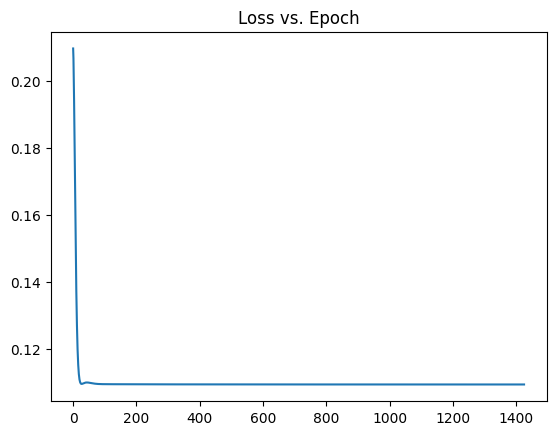

In [65]:
plt.plot(losses)
plt.title('Loss vs. Epoch')

Text(0.5, 1.0, 'Accuracy vs. Epoch')

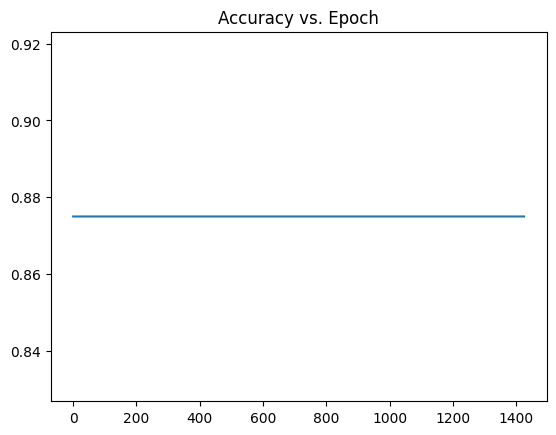

In [66]:
plt.plot(accuracies)
plt.title('Accuracy vs. Epoch')